In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Import DataFrame

In [4]:
customer = pd.read_csv('customers.csv')
depart = pd.read_csv('departments.csv')
order = pd.read_csv('orders.csv')
prod = pd.read_csv('products.csv')

We will start from orders data set

## Data Quality Check and Data Cleaning

In [5]:
# get the first insight with orders:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
# Renaming some features:
order.rename(columns={'order_dow':'day_of_week'},inplace=True)
# Dropping eval_set feature:
order.drop(['eval_set'],axis=1,inplace=True)
print(order.shape)

(3421083, 6)


There are 3421083 observations and 7 features in total for this data set and 'eval_set' has been dropped.

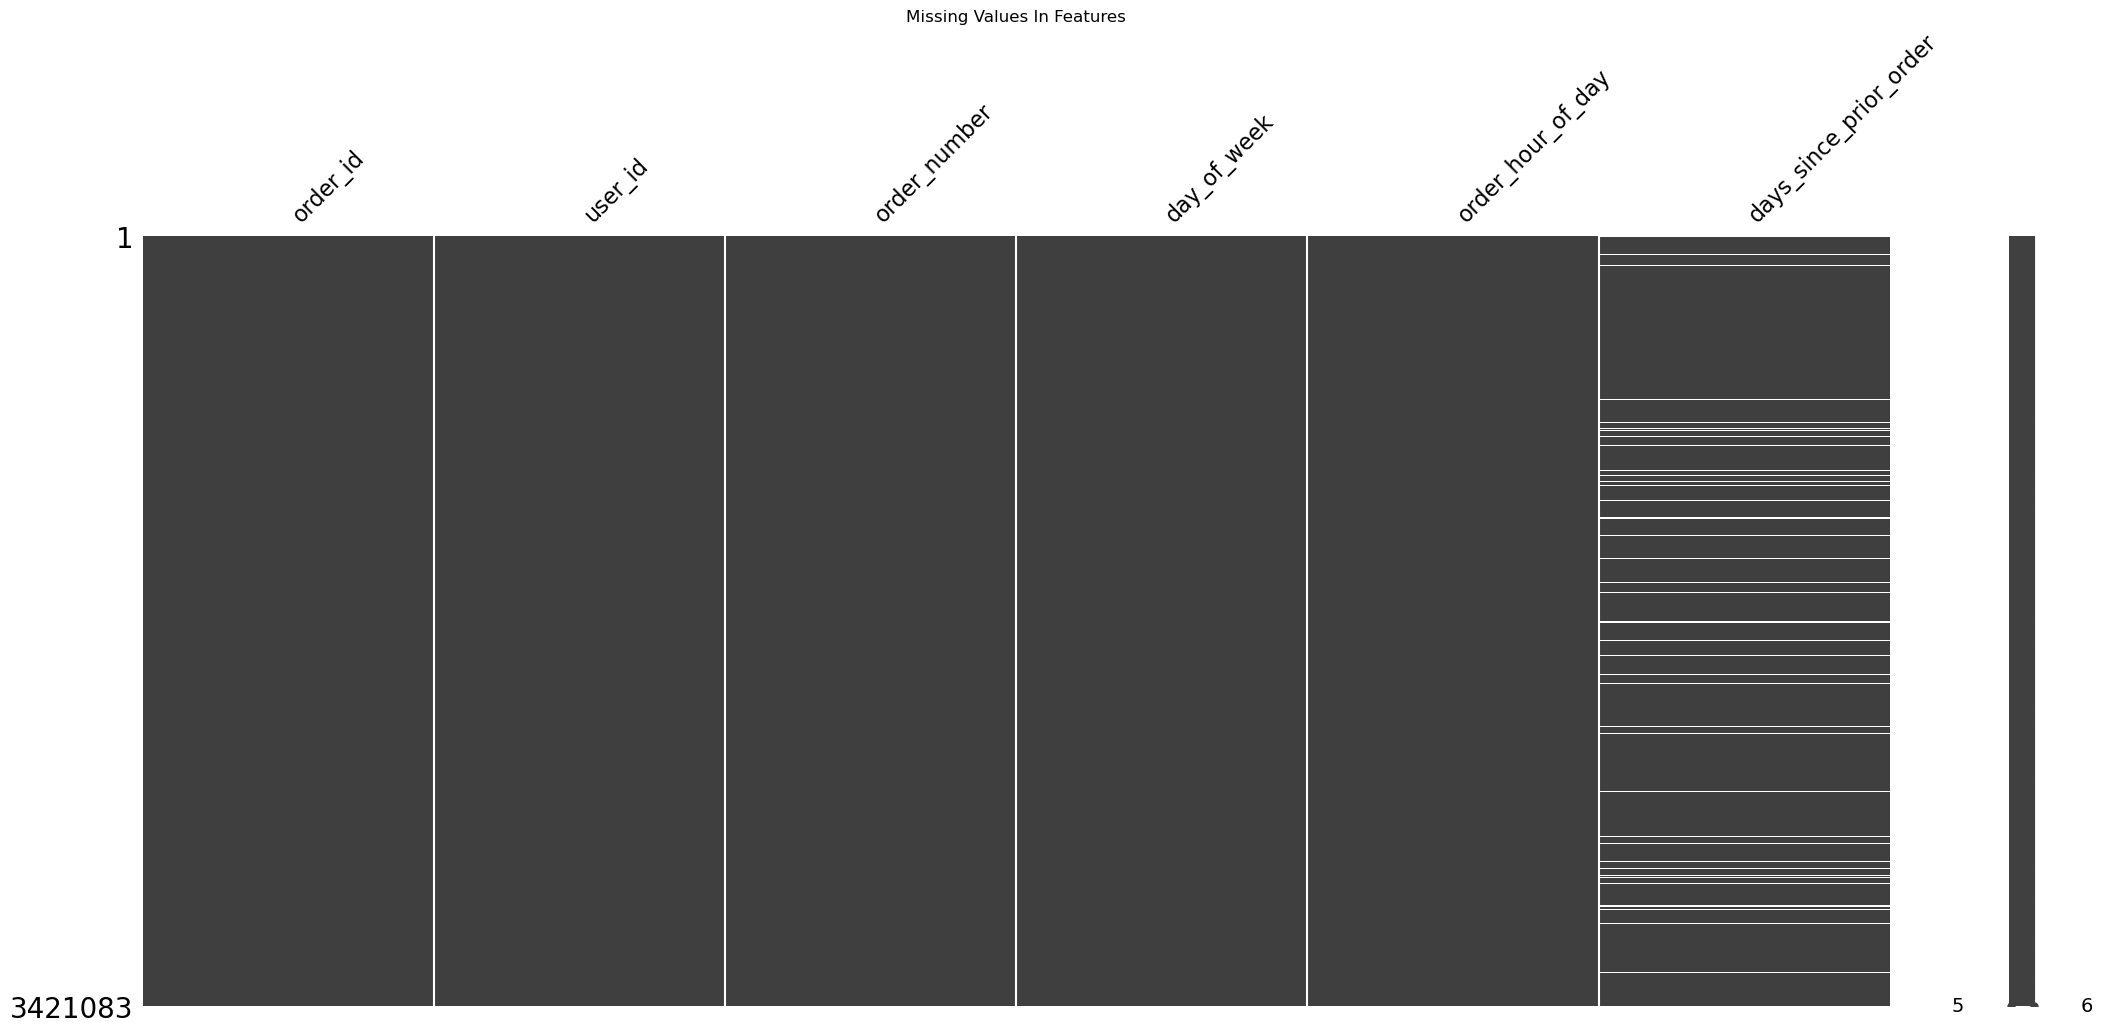

In [7]:
# Missing values check:
import missingno as msno
msno.matrix(order)
plt.title('Missing Values In Features')
plt.show()

The figure showed above as the white lines in each feature indicates the missing values, the more the white lines the more the missing values, let see how much percentage missing values for days_since_prior_order.

In [8]:
per_miss = round(order.isna().sum()/len(order)*100,2).sort_values(ascending=False)
print('The percentage of missing values are showing as:\n')
for key, value in per_miss.items():
    if value > 0:
        print(key+':',value,'%')

The percentage of missing values are showing as:

days_since_prior_order: 6.03 %


Only 'days_since_prior_order' contains 6.03% missing values, since the first order day can not be any orders happen, so there might be some misstakes in this feature that caused the missing values

In [9]:
miss_order = pd.crosstab(order['days_since_prior_order'],order['order_number'],dropna=False)
miss_order

order_number,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,2899,2915,2964,2634,2443,2236,2101,1972,1782,...,156,154,125,151,151,153,120,144,134,137
1.0,0,4822,4613,4690,4423,4047,4000,3744,3503,3358,...,397,396,373,359,366,330,356,360,339,321
2.0,0,6203,6209,6231,5789,5679,5274,5090,4914,4705,...,416,405,407,389,359,351,359,346,318,329
3.0,0,7411,7577,7414,7097,6770,6424,6078,5750,5663,...,345,287,330,294,291,292,254,221,240,223
4.0,0,8415,8476,8469,8029,7608,7092,6735,6534,6395,...,221,238,225,191,193,185,183,170,170,153
5.0,0,9216,9329,9220,8600,8228,7703,7270,6828,6563,...,142,128,105,119,119,120,100,95,82,81
6.0,0,11419,11701,11601,10771,10054,9521,8842,8527,7727,...,77,91,86,82,67,59,58,50,58,44
7.0,0,16788,16609,16341,15135,13834,13268,12452,11612,10980,...,60,56,48,56,36,37,37,41,32,35
8.0,0,10422,10304,10148,9378,8738,8068,7594,6894,6511,...,29,22,24,26,23,30,18,16,12,13


In [10]:
order['days_since_prior_order'].fillna(0,inplace=True)

In [11]:
# Checking the duplicates:
order.duplicated().sum()

0

In [12]:
# products data set checks:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49693 entries, 0 to 49692
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     49693 non-null  int64  
 1   product_name   49677 non-null  object 
 2   aisle_id       49693 non-null  int64  
 3   department_id  49693 non-null  int64  
 4   prices         49693 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ MB


Product name column contains 16 missing values and we will drop those missing values

In [13]:
prod.dropna(subset=['product_name'],inplace=True)

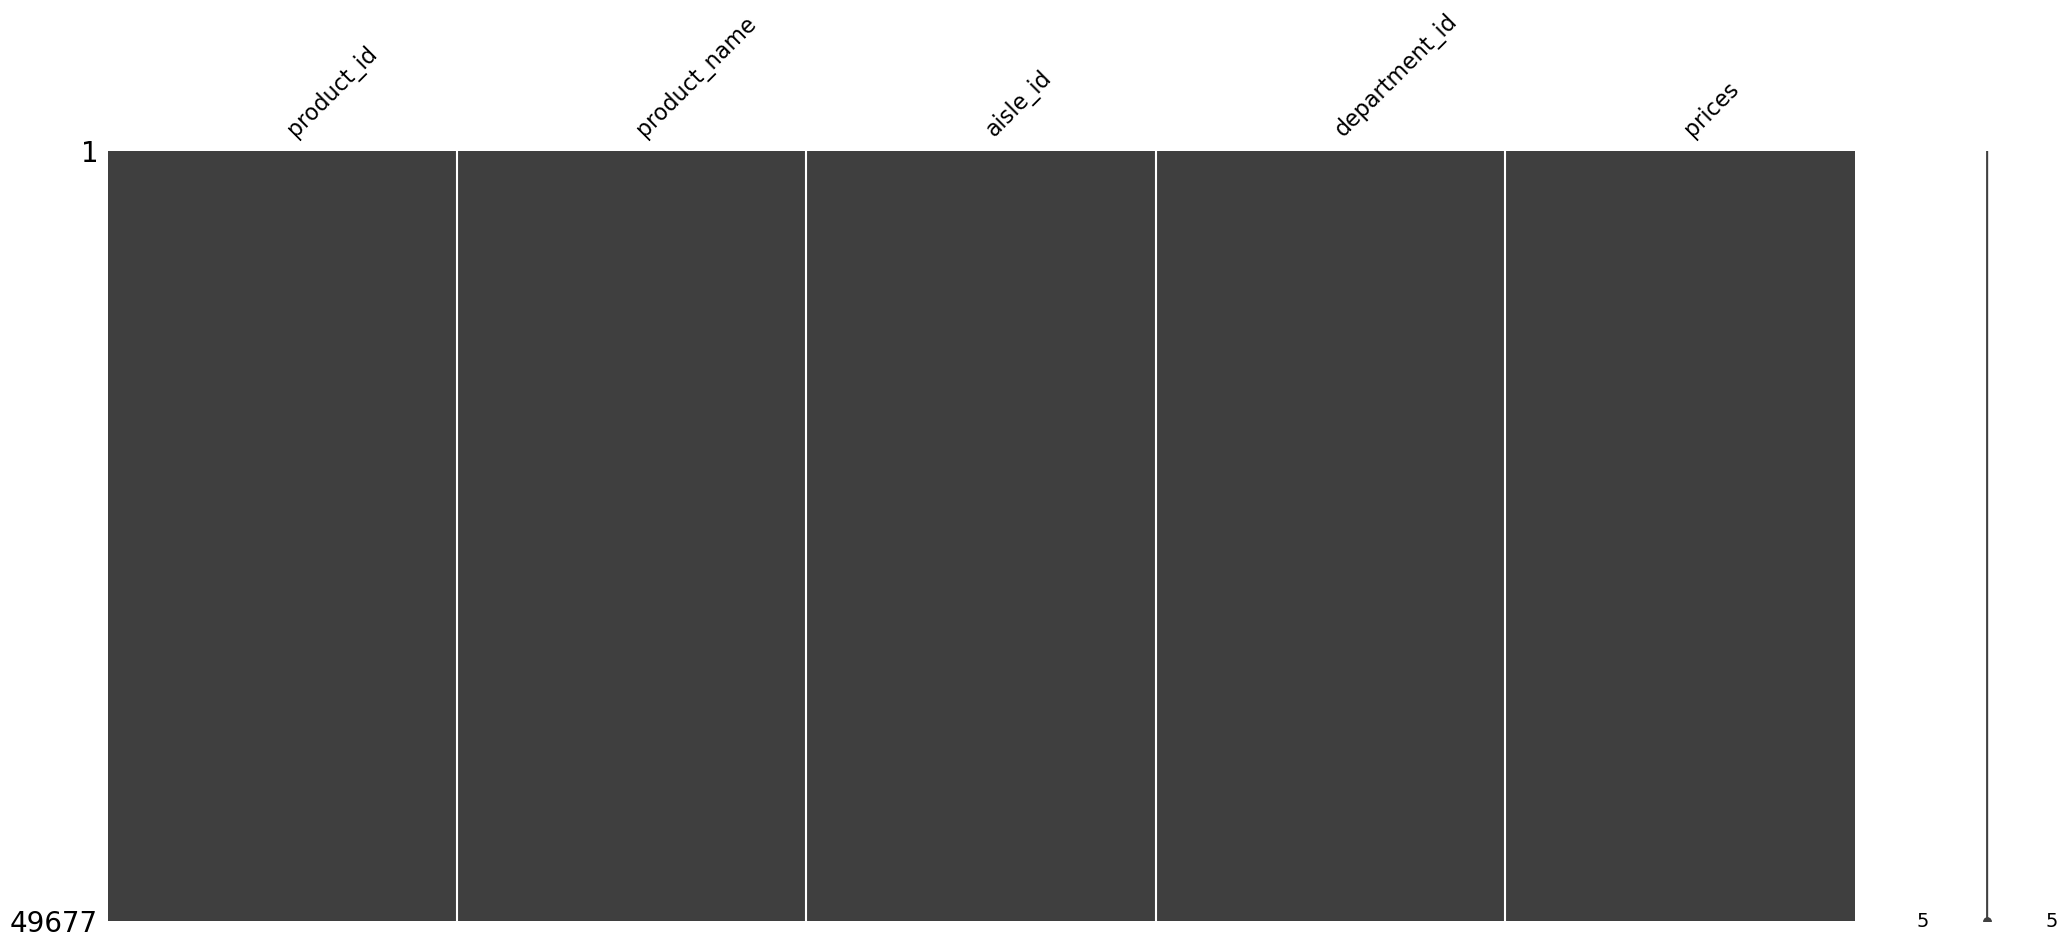

In [14]:
msno.matrix(prod)
plt.show()

In [15]:
# drop 'aisle_id' as we don't need it:
prod.drop(['aisle_id'],axis=1,inplace=True)

In [16]:
# check duplicates:
prod.duplicated().sum()

5

In [17]:
# drop duplicates:
prod.drop_duplicates(keep='first',inplace=True)

In [18]:
print('The data set shape after cleaning is',prod.shape)

The data set shape after cleaning is (49672, 4)


In [19]:
prod['prices'].agg([np.min,np.max,np.mean,np.std])

amin        1.000000
amax    99999.000000
mean        9.993282
std       453.615536
Name: prices, dtype: float64

As the grocery store won't exsit any product with the price 99999, so we will find out the price that above 100 and then remove them

In [20]:
prod = prod.query('prices < 100')
print(prod['prices'].agg([np.min,np.max,np.mean,np.std]))

amin     1.000000
amax    25.000000
mean     7.680437
std      4.199381
Name: prices, dtype: float64


In [21]:
# Departments:
depart.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


We need covert the columns to rows 

In [22]:
dep = depart.T.reset_index()
# Reset the index after coverting:
# Create new header:
new_header = dep.iloc[0]

# after we create the new header, we can start our data from first 1:
dept = dep.loc[1:]
# put the new header in:
dept.columns = new_header
dept

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [23]:
# Megering department and products as they have the same key department_id, but we must be sure the value keys are the same data type:
print(prod['department_id'].dtype,dept['department_id'].dtype)
# Coverting the int64 to object type for merging use:
prod['department_id'] = prod['department_id'].astype('str')

# Merging the two data sets:
prod_merge = prod.merge(dept,on='department_id',how='inner')
print(prod_merge.shape)


int64 object
(49670, 5)


In [24]:
prod_prior = pd.read_csv('order_products_prior.csv')
prod_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [25]:
# drop add_to_cart_order:
prod_prior.drop(['add_to_cart_order'],axis=1,inplace=True)

In [26]:
# Data quality checks:
prod_prior.isna().sum()

order_id      0
product_id    0
reordered     0
dtype: int64

In [27]:
prod_prior.duplicated().sum()

0

In [28]:
# Merging the orders with this new data frame by using the order_id column:
print(order['order_id'].dtype,prod_prior['order_id'].dtype)
# As they have same data types, so we can merge them without covert the data type:
prod_ord_meg = order.merge(prod_prior,on='order_id',how='inner')
print('After merging, the new shape is:\n',prod_ord_meg.shape)

int64 int64
After merging, the new shape is:
 (32434489, 8)


In [29]:
# print the new data set info:
prod_ord_meg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   day_of_week             int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   reordered               int64  
dtypes: float64(1), int64(7)
memory usage: 2.2 GB


In [30]:
# Merging with the new merged data set prod_merge by using product_id:
ord_all = prod_merge.merge(prod_ord_meg,on='product_id',how='inner')
print('The new data frmae shape after merging is:\n',ord_all.shape)

The new data frmae shape after merging is:
 (32399732, 12)


In [31]:
# the ord_all info:
ord_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399732 entries, 0 to 32399731
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   department_id           object 
 3   prices                  float64
 4   department              object 
 5   order_id                int64  
 6   user_id                 int64  
 7   order_number            int64  
 8   day_of_week             int64  
 9   order_hour_of_day       int64  
 10  days_since_prior_order  float64
 11  reordered               int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 3.1+ GB


In [32]:
# customers:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [33]:
# we won't keep customer's name as the private reason:
customer.drop(['First Name','Surnam'],axis=1,inplace=True)

In [34]:
customer.rename(columns={'STATE':'state','Age':'age','Gender':'gender'},inplace=True)
print(customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   gender        206209 non-null  object
 2   state         206209 non-null  object
 3   age           206209 non-null  int64 
 4   date_joined   206209 non-null  object
 5   n_dependants  206209 non-null  int64 
 6   fam_status    206209 non-null  object
 7   income        206209 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.6+ MB
None


In [35]:
# Check duplicates:
customer.duplicated().sum()

0

In [36]:
# merging the clean customer data with the all merged data set rd_all by using user_id:
final_all = customer.merge(ord_all,on='user_id',how='inner')
print('The final merged data frame shape is:\n',final_all.shape)
print(final_all.info())

The final merged data frame shape is:
 (32399732, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399732 entries, 0 to 32399731
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   gender                  object 
 2   state                   object 
 3   age                     int64  
 4   date_joined             object 
 5   n_dependants            int64  
 6   fam_status              object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  department_id           object 
 11  prices                  float64
 12  department              object 
 13  order_id                int64  
 14  order_number            int64  
 15  day_of_week             int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  reordered               int64  
dtypes: float64(2), int64(10), object(7)
memory usage:

In [37]:
final_all.to_pickle('final_all.pkl')

## Understading the Final Merged Data Set

In [38]:
final_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399732 entries, 0 to 32399731
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   gender                  object 
 2   state                   object 
 3   age                     int64  
 4   date_joined             object 
 5   n_dependants            int64  
 6   fam_status              object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  department_id           object 
 11  prices                  float64
 12  department              object 
 13  order_id                int64  
 14  order_number            int64  
 15  day_of_week             int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  reordered               int64  
dtypes: float64(2), int64(10), object(7)
memory usage: 4.8+ GB


In this final data set, we have total of 32399732 rows and 21 columns. There are 9 categorical columns and 12 numerical colums. Here are the defination of each column:
* user_id: Integer variable to give every customer an unique id to record their orders.
* gender: Binary categorical variable to identify customers' gender,Famale or Male
* state: Categorical Variable to track customers' original states.
* age: Integer variable, through 18 to 81.
* data_joined: Time series showing the date that customers registered in our App,trough 2017 to 2019.
* n_dependants: Integer variable shows how many dependents customers have.
* fam_status: Categrocal variable contains four types, married, single, living with parents and divorced.
* income: Integer variable shows the income for every customer to make. Between 25000 and 590000.

## Business Analysis

Objective:

You’re an analyst for an existing company, Instacart, an online grocery store that operates
through an app. Instacart already has very good sales, but they want to uncover more
information about their sales patterns. Your task is to perform an initial data and exploratory
analysis of some of their data in order to derive insights and suggest strategies for better
segmentation based on the provided criteria.


### Week Days & Day Hours Order Status: 

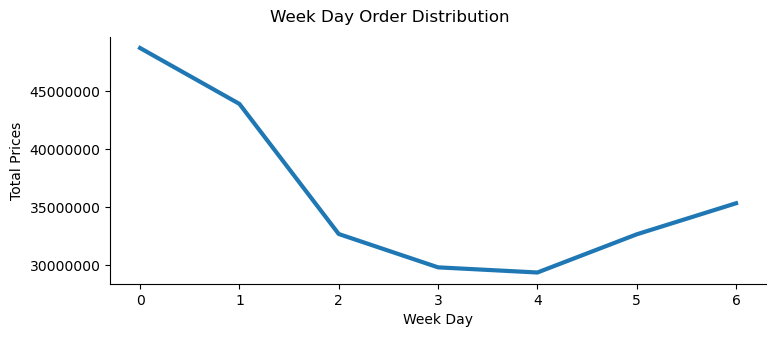

In [39]:
spend_day = final_all.groupby('day_of_week')['prices'].agg('sum').reset_index()
g = sns.relplot(x='day_of_week',
           y='prices',
           data=spend_day,kind='line',
               linewidth=3)
g.fig.suptitle('Week Day Order Distribution',y=1.03)
g.fig.set_size_inches(8,3)
g.set_axis_labels('Week Day','Total Prices')
plt.ticklabel_format(axis='y',style='plain')
plt.show()

The varable 'day_of_week' corresponds to a number as follows:

0 = Saturday

1 = Sunday

2 = Monday

3 = Tuesday

4 = Wednesday

5 = Thursday

6 = Friday, so it shows clearly that 0 which indicates Saturday was the busiest day of the week with the most orders and then followd by Sunday, Friday. Normaly customers don't order oftenly through Wednesday and Thursday as these two days have the lowest points in the line plot. Most orders happened in weekend as customers have enough time for shopping.

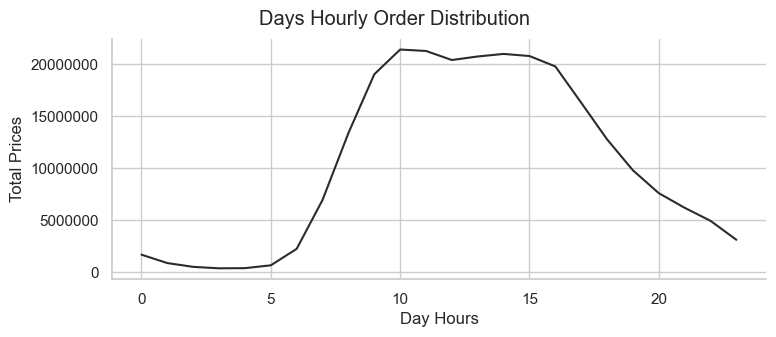

In [112]:
spend_hour = final_all.groupby('order_hour_of_day')['prices'].agg('sum').reset_index()
sns.set(style='whitegrid',palette='Greys_r')
g = sns.relplot(x='order_hour_of_day',
           y='prices',
           data=spend_hour,kind='line')
g.fig.suptitle('Days Hourly Order Distribution',y=1.03)
g.fig.set_size_inches(8,3)
g.set_axis_labels('Day Hours','Total Prices')
plt.ticklabel_format(axis='y',style='plain')
plt.show()

customers normaly start to order from 6am and the order numbers are incresing till to the peak which shows at 10am, then goes a little steady last to 16pm, after that the orders starts to decrease.

### Products Price Tag Analysis:

In [41]:
final_all['prices'].agg([np.min,np.max])

amin     1.0
amax    25.0
Name: prices, dtype: float64

We have a price range from 1 to 25, as there are so many different price tags, so we will group the price into levels:

1-9: Low price product

10-19: Average price product

20-25: High price product

In [42]:
result = []
for value in final_all['prices']:
    if value  >=1 and value <= 9:
        result.append('Low price product')
    elif value > 9 and value <= 19:
        result.append('Average price product')
    else:
        result.append('High price product')
final_all['product_tag'] = result
print(final_all['product_tag'].value_counts(dropna=False))

Low price product        20024451
Average price product    12090779
High price product         284502
Name: product_tag, dtype: int64


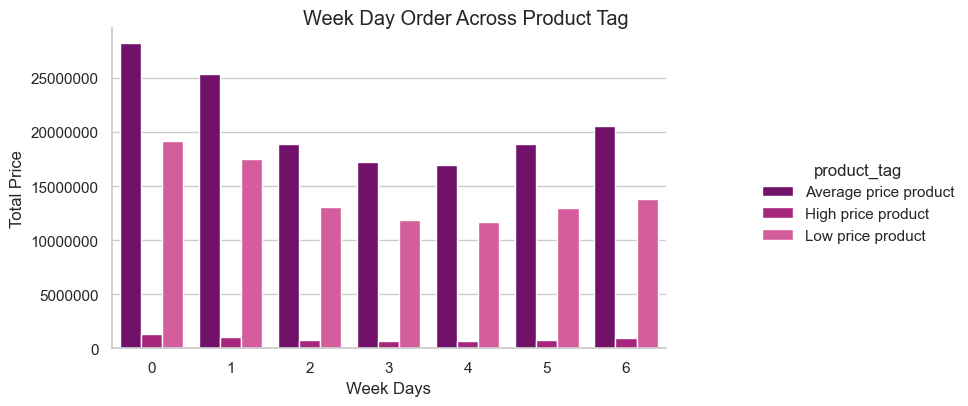

In [44]:
sns.set(style='whitegrid',palette='RdPu_r')
g = sns.catplot(x='day_of_week',y='sum',data=final_all.groupby(['day_of_week','product_tag'])['prices'].agg(['sum']).reset_index(),
           hue='product_tag',
           kind='bar')
g.fig.suptitle('Week Day Order Across Product Tag')
g.set_axis_labels('Week Days','Total Price')
g.fig.set_size_inches(10,4)
plt.ticklabel_format(axis='y',style='plain')
plt.show()

Most customers like ordering average price product which means the price between 10 to 19, and then the low price product. The orders with the price above 20 are always few during all the week days.

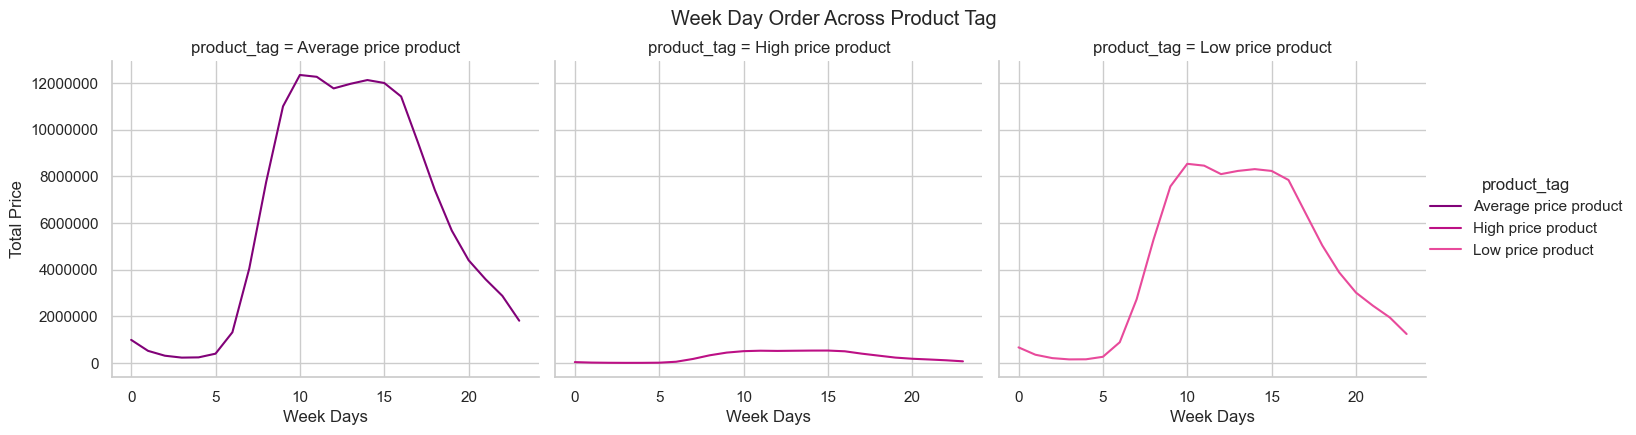

In [45]:
sns.set(style='whitegrid',palette='RdPu_r')
g = sns.relplot(x='order_hour_of_day',y='sum',data=final_all.groupby(['order_hour_of_day','product_tag'])['prices'].agg(['sum']).reset_index(),
           hue='product_tag',
           kind='line',
               col='product_tag')
g.fig.suptitle('Week Day Order Across Product Tag',y=1.05)
g.set_axis_labels('Week Days','Total Price')
g.fig.set_size_inches(16,4)
plt.ticklabel_format(axis='y',style='plain')
plt.show()

The orders with the product price above 20 is steaday with few orders cross the whole day which means customers wouldn't like ordering high price products, so for those products would be better doing promotions to attract customers' eyes.

### Department Analysis:

In [46]:
final_all.groupby('product_name')['prices'].agg('sum').reset_index().sort_values(by='prices',ascending=False)[:15]

,product_name,prices
3674,Banana,5812549.5
3469,Bag of Organic Bananas,3908335.0
22405,Large Lemon,2137198.0
23412,Limes,2067216.9
28830,Organic Baby Spinach,1983752.2
31910,Organic Strawberries,1932185.9
32467,Organic Whole Milk,1765184.0
11626,Cucumber Kirby,1284558.0
2626,Apple Honeycrisp Organic,1198782.0
29593,Organic Cucumber,1149605.6


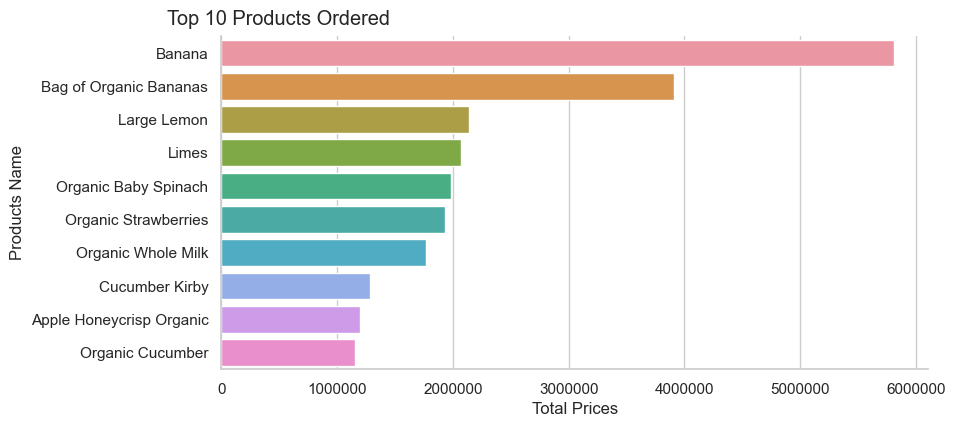

In [47]:
g = sns.catplot(x='prices',
           y='product_name',
           data=final_all.groupby('product_name')['prices'].agg('sum').reset_index().sort_values(by='prices',ascending=False)[:10],
           kind='bar')
g.fig.set_size_inches(14,4)
g.fig.suptitle('Top 10 Products Ordered',y=1.03)
g.set_axis_labels('Total Prices','Products Name')
plt.ticklabel_format(axis='x',style='plain')
plt.show()

The above bar chart shows us the top 10 products ordered by customers across the total of 21 departments, next we will find out the top 5 products in each department.

In [48]:
final_all['department'].value_counts()

produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

Above showing the departments with the orders numbers from most to least, we will explore what are the top 5 products in the top 6 departments by creating six subsets then plot them with bar figure.

In [49]:
# Create the subsets with top6 departments:
produce = final_all[final_all['department']=='produce'].groupby('product_name')['prices'].agg('sum').reset_index().sort_values(by='prices',ascending=False)[:5]
dairy = final_all[final_all['department']=='dairy eggs'].groupby('product_name')['prices'].agg('sum').reset_index().sort_values(by='prices',ascending=False)[:5]
snacks = final_all[final_all['department']=='snacks'].groupby('product_name')['prices'].agg('sum').reset_index().sort_values(by='prices',ascending=False)[:5]
beverage = final_all[final_all['department']=='beverages'].groupby('product_name')['prices'].agg('sum').reset_index().sort_values(by='prices',ascending=False)[:5]
frozen = final_all[final_all['department']=='frozen'].groupby('product_name')['prices'].agg('sum').reset_index().sort_values(by='prices',ascending=False)[:5]
pantry = final_all[final_all['department']=='pantry'].groupby('product_name')['prices'].agg('sum').reset_index().sort_values(by='prices',ascending=False)[:5]

In [50]:
def barplot(x,y,data,axes,title):
    sns.set_palette('Reds')
    sns.set_context('paper')
    ax = sns.barplot(x=x,
                    y=y,
                    data=data,
                    dodge=False,
                    ax=axes).set_title(title)

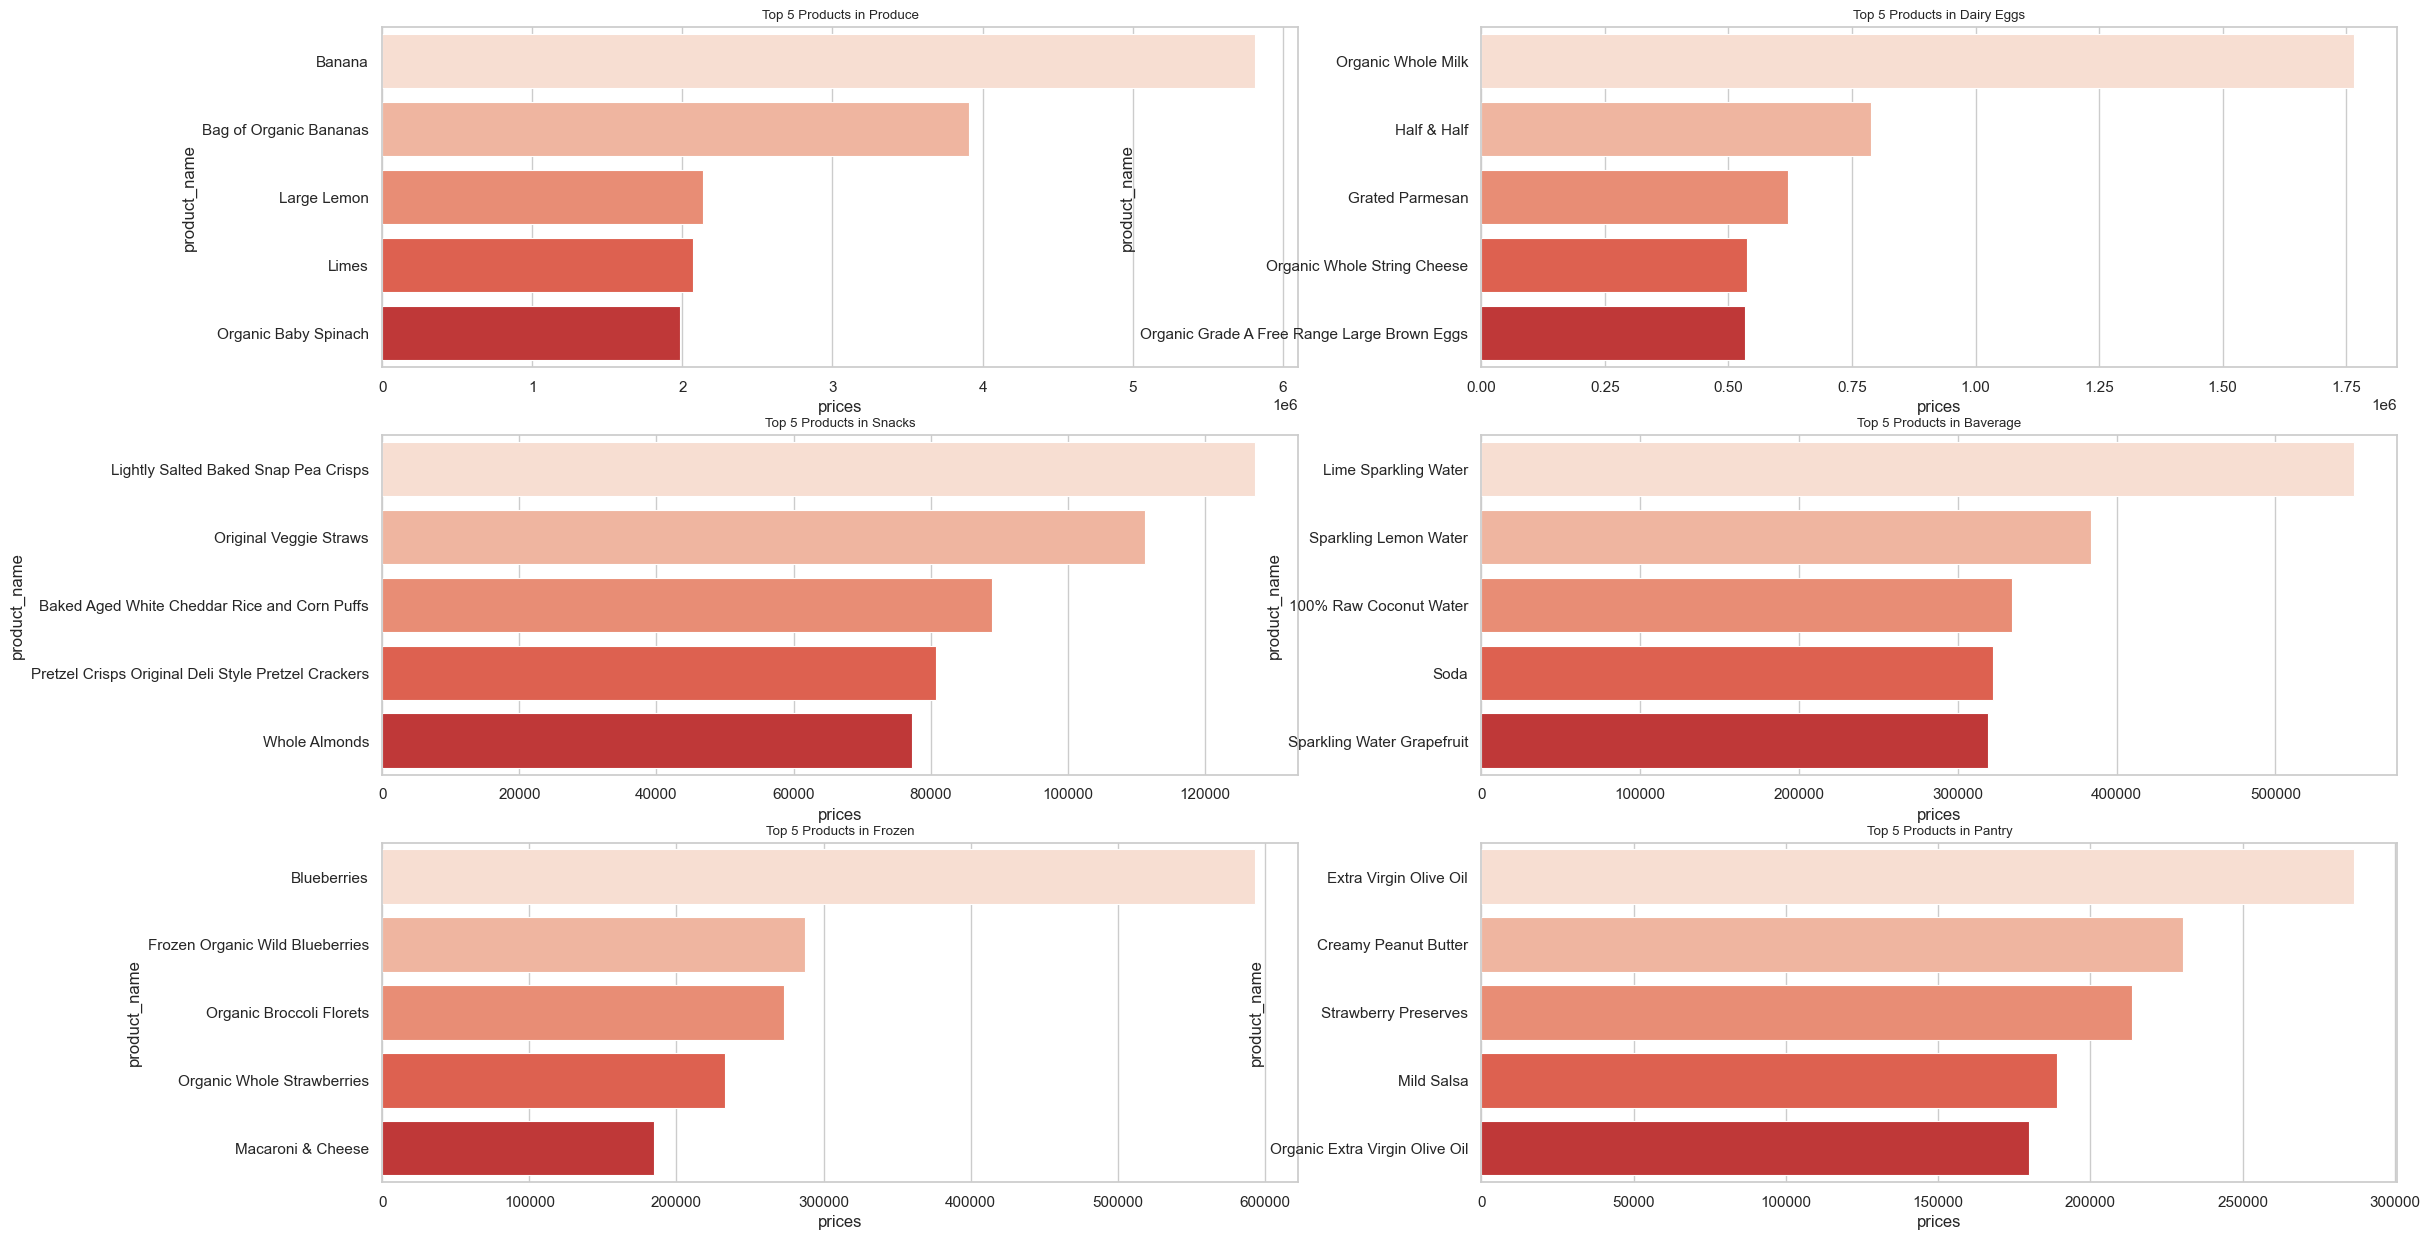

In [51]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(26,15))
barplot('prices','product_name',produce,ax1,'Top 5 Products in Produce')
barplot('prices','product_name',dairy,ax2,'Top 5 Products in Dairy Eggs')
barplot('prices','product_name',snacks,ax3,'Top 5 Products in Snacks')
barplot('prices','product_name',beverage,ax4,'Top 5 Products in Baverage')
barplot('prices','product_name',frozen,ax5,'Top 5 Products in Frozen')
barplot('prices','product_name',pantry,ax6,'Top 5 Products in Pantry')

Now, we can clearly to find out what are the top 5 products in the top 6 departemnts 

### Brand Loyalty Analysis: 

In [52]:
# Checking the order numbers statistic:
final_all['order_number'].describe().T

count    3.239973e+07
mean     1.714260e+01
std      1.753544e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.400000e+01
max      9.900000e+01
Name: order_number, dtype: float64

As showing, we have the order numbers range between 1 and 99,so we will separate our customers into three groups:

Order number >= 40: Rotal customer;

Order number > 10 and < 40: Regular customer;

Order number <= 10: New customer.

In [53]:
result = []
for value in final_all.groupby('user_id')['order_number'].transform(np.max):
    if value >=40:
        result.append('Royal customer')
    elif value > 10 and value < 40:
        result.append('Regular customer')
    elif value <= 10:
        result.append('New customer')
    else:
        result.append('No data')

In [54]:
final_all['loyalty_flag'] = result
final_all['loyalty_flag'].value_counts()

Regular customer    15506852
Royal customer      10650039
New customer         6242841
Name: loyalty_flag, dtype: int64

In [55]:
final_all.groupby('loyalty_flag')['days_since_prior_order'].agg('mean').reset_index()

,loyalty_flag,days_since_prior_order
0,New customer,14.832027
1,Regular customer,11.623357
2,Royal customer,5.998148


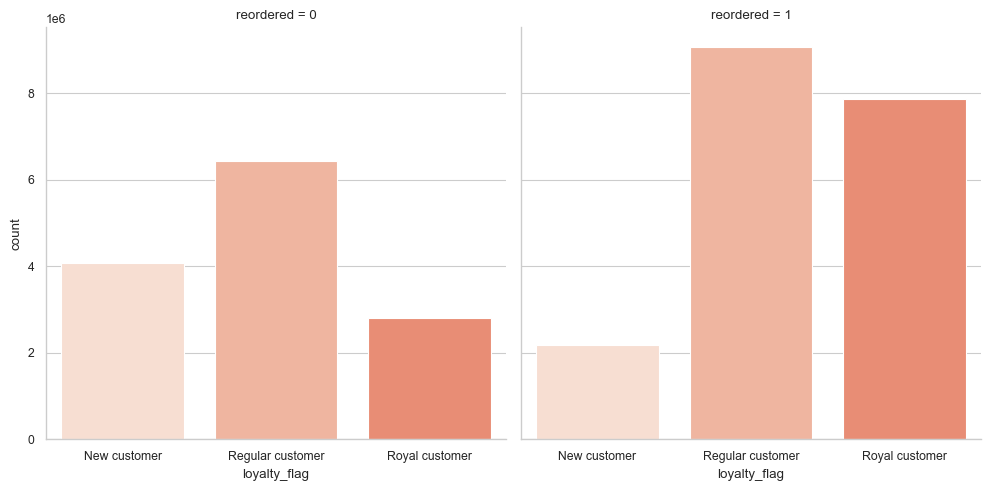

In [56]:
sns.catplot(x='loyalty_flag',
           data=final_all,
           kind='count',
           col='reordered')
plt.show()

The average back order days for our royal customers is 6,and our royal customer like reorder the products as showing the above plot.

Our regular customers normaly back orders in 11.5 days and they have the highest reorder times, however, they also have a big group that not back order our products.

New customers seems not quite often our products and they also don't like back orders from us.

#### Loyalty Status Across Departmen

In [57]:
final_all.groupby(['loyalty_flag','department'])['prices'].agg('sum').reset_index()

,loyalty_flag,department,prices
0,New customer,alcohol,306614.4
1,New customer,babies,466215.0
2,New customer,bakery,1744769.9
3,New customer,beverages,3913908.5
4,New customer,breakfast,1107297.0
...,...,...,...
58,Royal customer,pantry,4703281.6
59,Royal customer,personal care,1025352.4
60,Royal customer,pets,208941.7
61,Royal customer,produce,25909199.3


In [58]:
loy_ind = final_all.set_index('loyalty_flag')
def flag(name):
    data = loy_ind.loc[name]
    sns.set_palette('Reds')
    sns.set_context('paper')
    g = sns.catplot(x='department',
           y='prices',
           data=data.groupby('department')['prices'].agg('sum').reset_index(),
           kind='bar'
           )
    g.fig.suptitle('Total Orders in '+name+' Across Department',y=1.1,fontsize=16)
    g.fig.set_size_inches(20,10)
    g.set_axis_labels('Department','Total Orders')
    plt.ticklabel_format(axis='y',style='plain')
    plt.show()

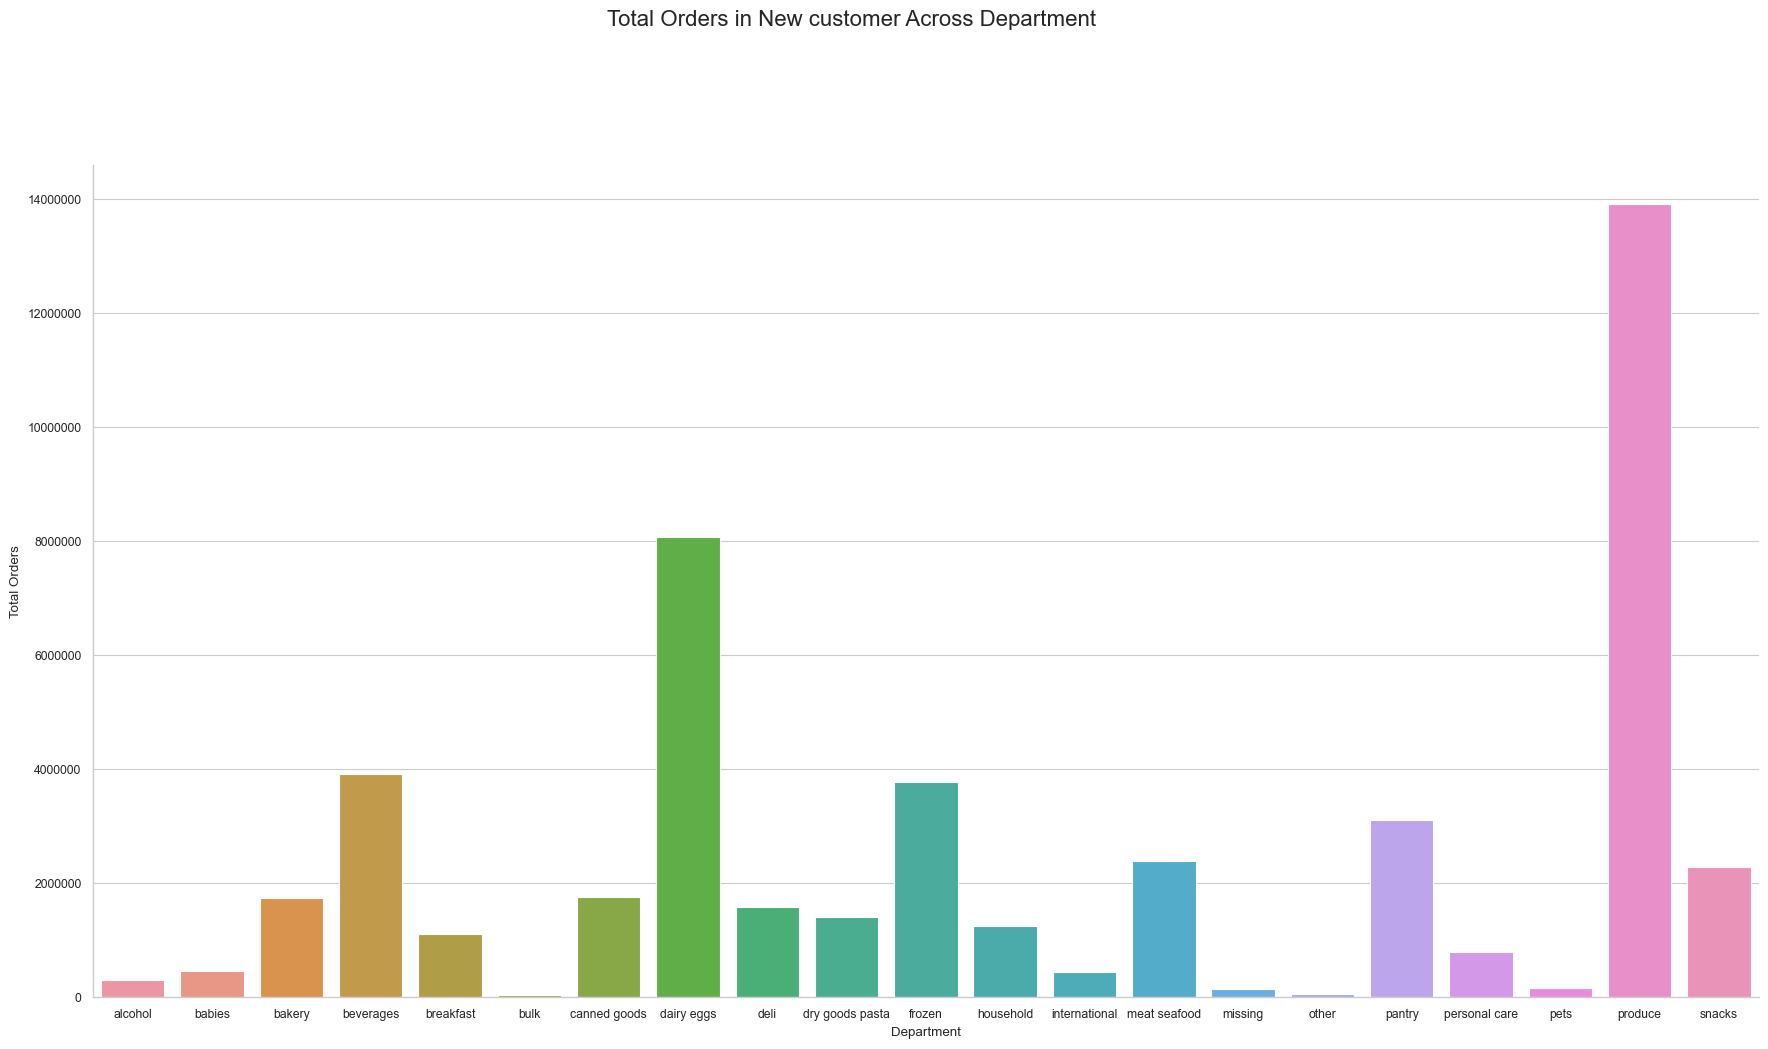

In [59]:
# What's our new customers' order habits across department?
flag('New customer')

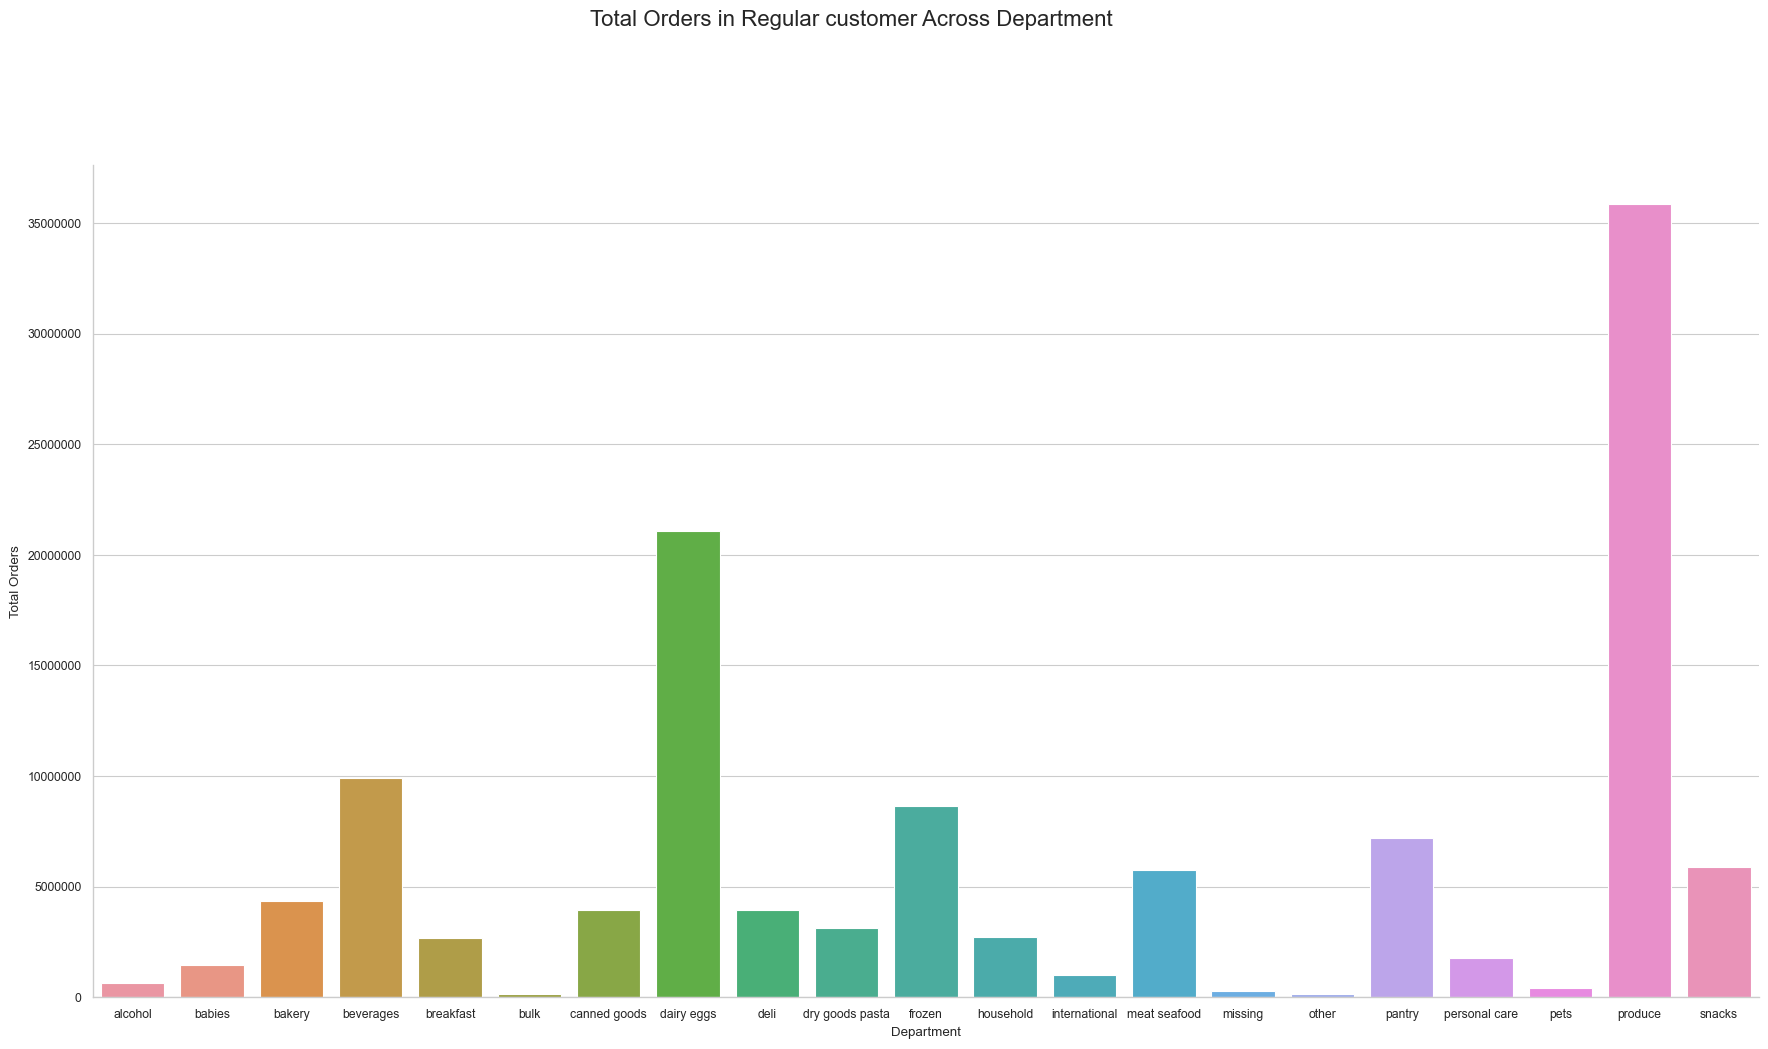

In [60]:
# What's our regular customers' order habits across department?
flag('Regular customer')

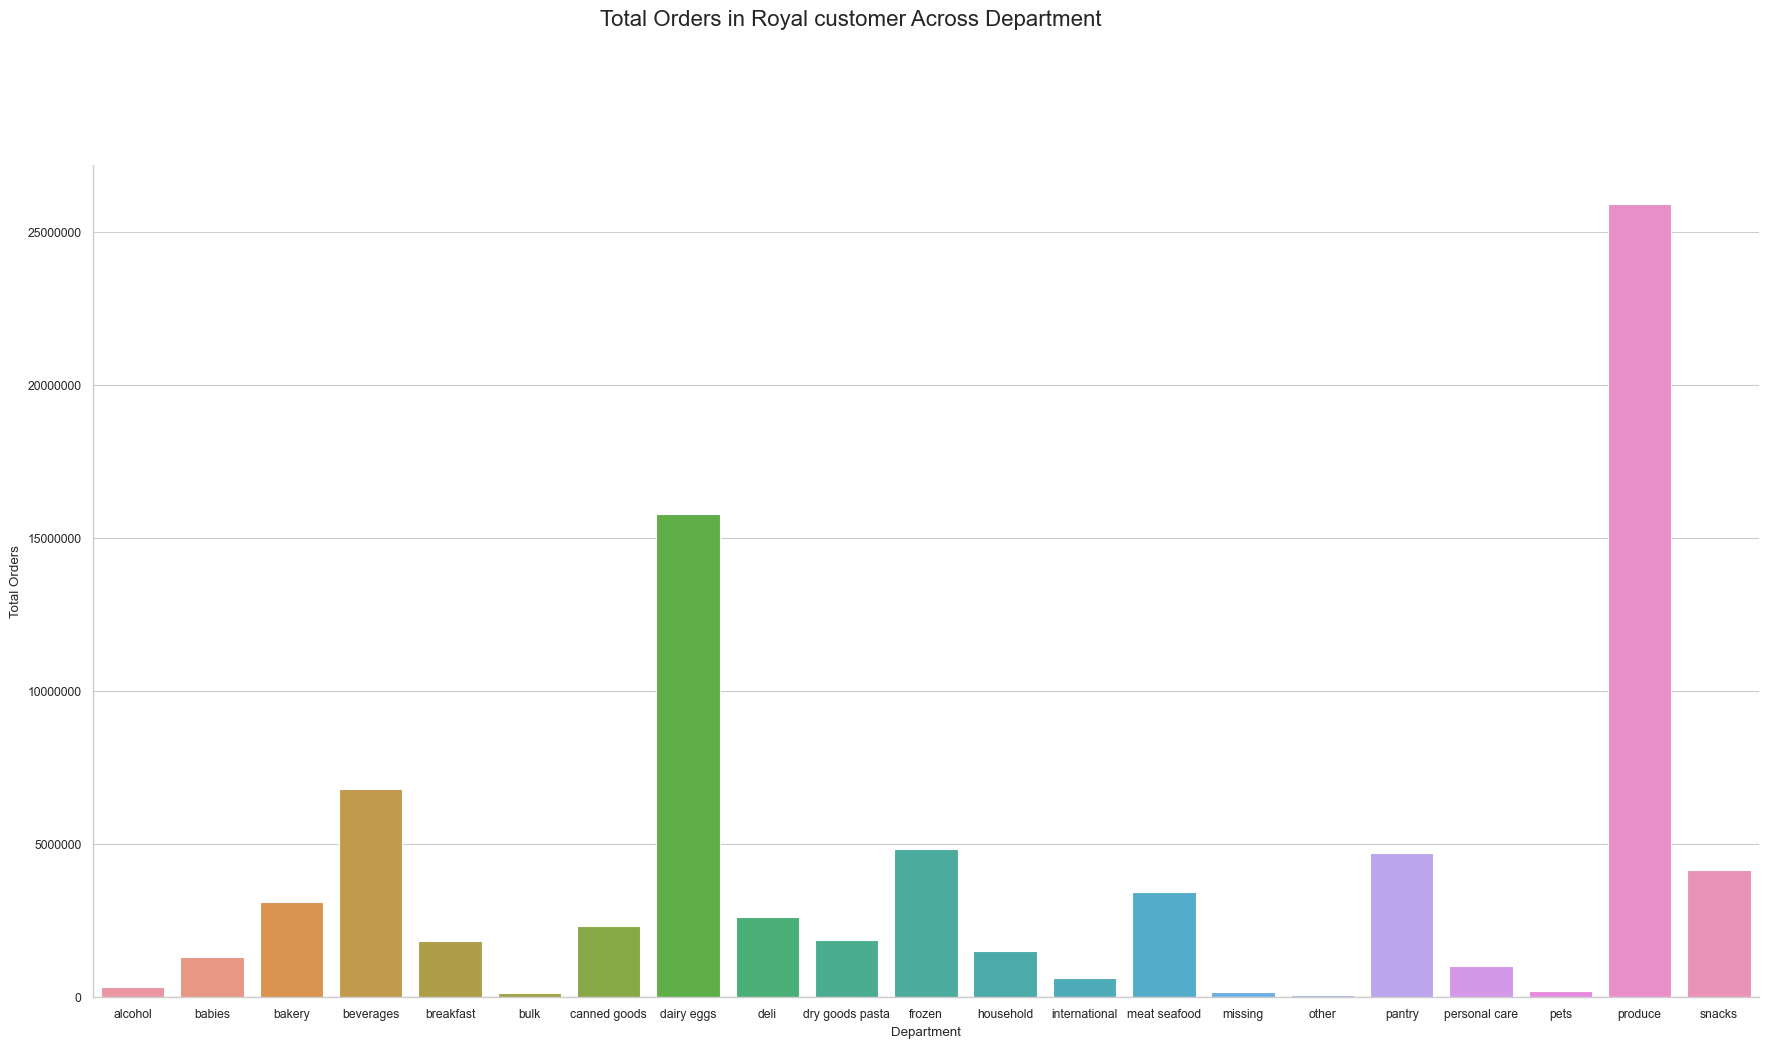

In [61]:
# What's our royal customers' order habits across department?
flag('Royal customer')

There are no different based on the order habit across departments based on the brand loyalty flag. Our royalty customer,reggular customer and even new customer all like ording through produce and dairy eggs departments.

#### Loyalty Status Across Week Days

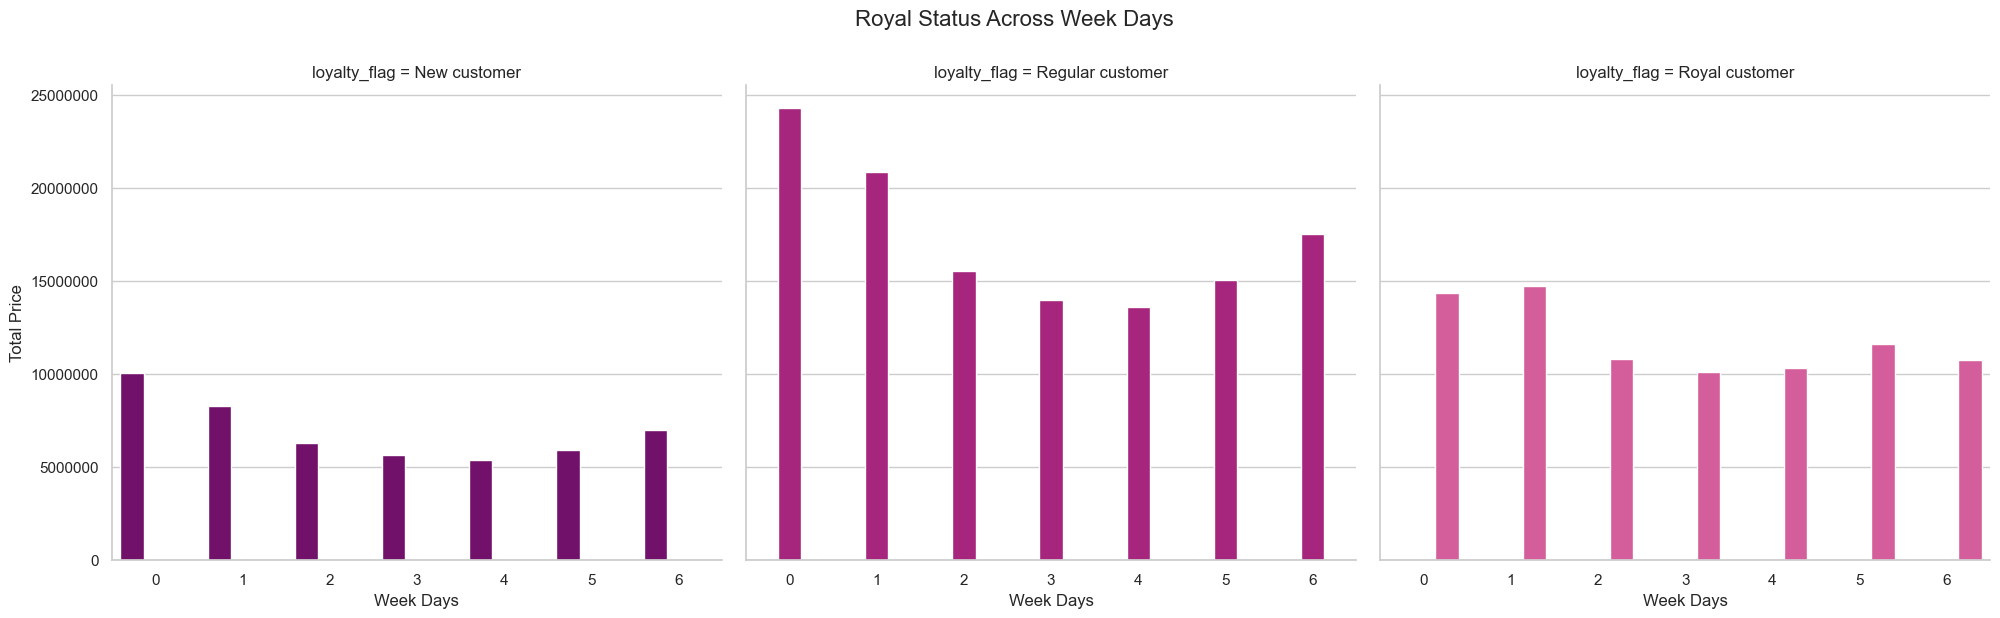

In [62]:
sns.set(style='whitegrid',palette='RdPu_r')
g = sns.catplot(x='day_of_week',y='sum',
               data=final_all.groupby(['day_of_week','loyalty_flag'])['prices'].agg(['sum']).reset_index(),
               hue='loyalty_flag',
               kind='bar',
               col='loyalty_flag',
               legend=True
            )
g.fig.suptitle('Royal Status Across Week Days',y=1.05,fontsize=16)
g.set_axis_labels('Week Days','Total Price',fontsize=12)
g.fig.set_size_inches(20,6)
plt.ticklabel_format(axis='y',style='plain')
plt.show()

Our royal customers like ordeing in Sunday and then Saturday, our regular and new customers like ordering on Saturday more than Sunday, otherwise, the left of week days are pretty close among three groups.

#### Loyalty Status Across Hours of Day

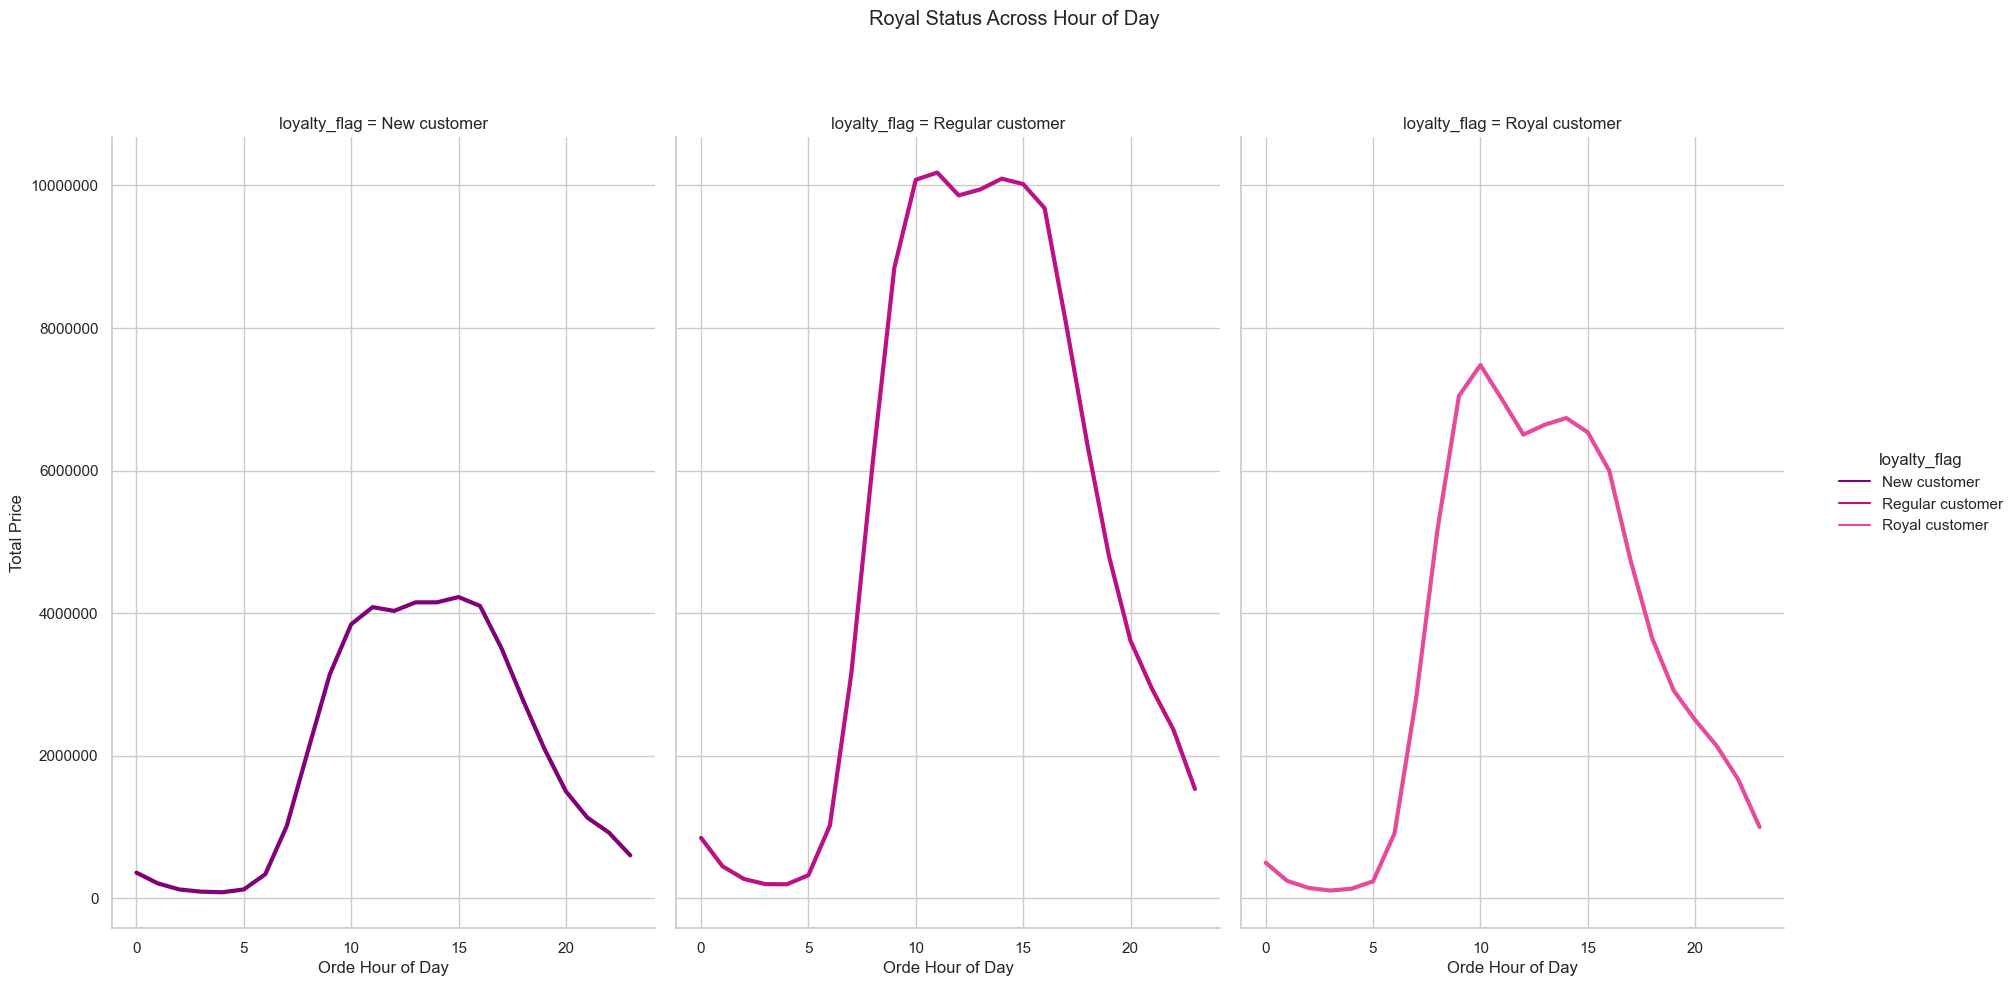

In [63]:
sns.set(style='whitegrid',palette='RdPu_r')
g = sns.relplot(x='order_hour_of_day',y='sum',data=final_all.groupby(['order_hour_of_day','loyalty_flag'])['prices'].agg(['sum']).reset_index(),
           hue='loyalty_flag',
           kind='line',
               col='loyalty_flag',
               linewidth=3)
g.fig.suptitle('Royal Status Across Hour of Day',y=1.05)
g.set_axis_labels('Orde Hour of Day','Total Price')
g.fig.set_size_inches(20,10)
plt.ticklabel_format(axis='y',style='plain')
plt.show()

These three groups of customers all like ordering from 10am and till 16pm seems sliding down a little bit. However, new customers keep ordeing smoothly between 10 am and 15pm, then sundenly sliding down. Regular customers's order peak happend at 10am and sundenly starting to drop down then goes up a little bit till 15pm. Definatly, we can say, between 10am and 15pm are the most busiest hours of the day.

### Age & Family Status Analysis:

In [64]:
final_all['fam_status'].unique()

array(['married', 'single', 'living with parents and siblings',
       'divorced/widowed'], dtype=object)

We have the age range through 18 to 81, so we will deverse a new column named as 'age_group' to analysis if there is a connectiom between age and family status.

In [65]:
final_all['age_group'] = final_all['age'].apply(lambda x: 'Under 35' if x<35 
                                                else '35-54' if 35<=x<55
                                                else '55-74' if 55<=x<75
                                                else 'Above 75'
                                               )
final_all['age_group'].value_counts(dropna=False)

35-54       10171986
55-74       10032004
Under 35     8626267
Above 75     3569475
Name: age_group, dtype: int64

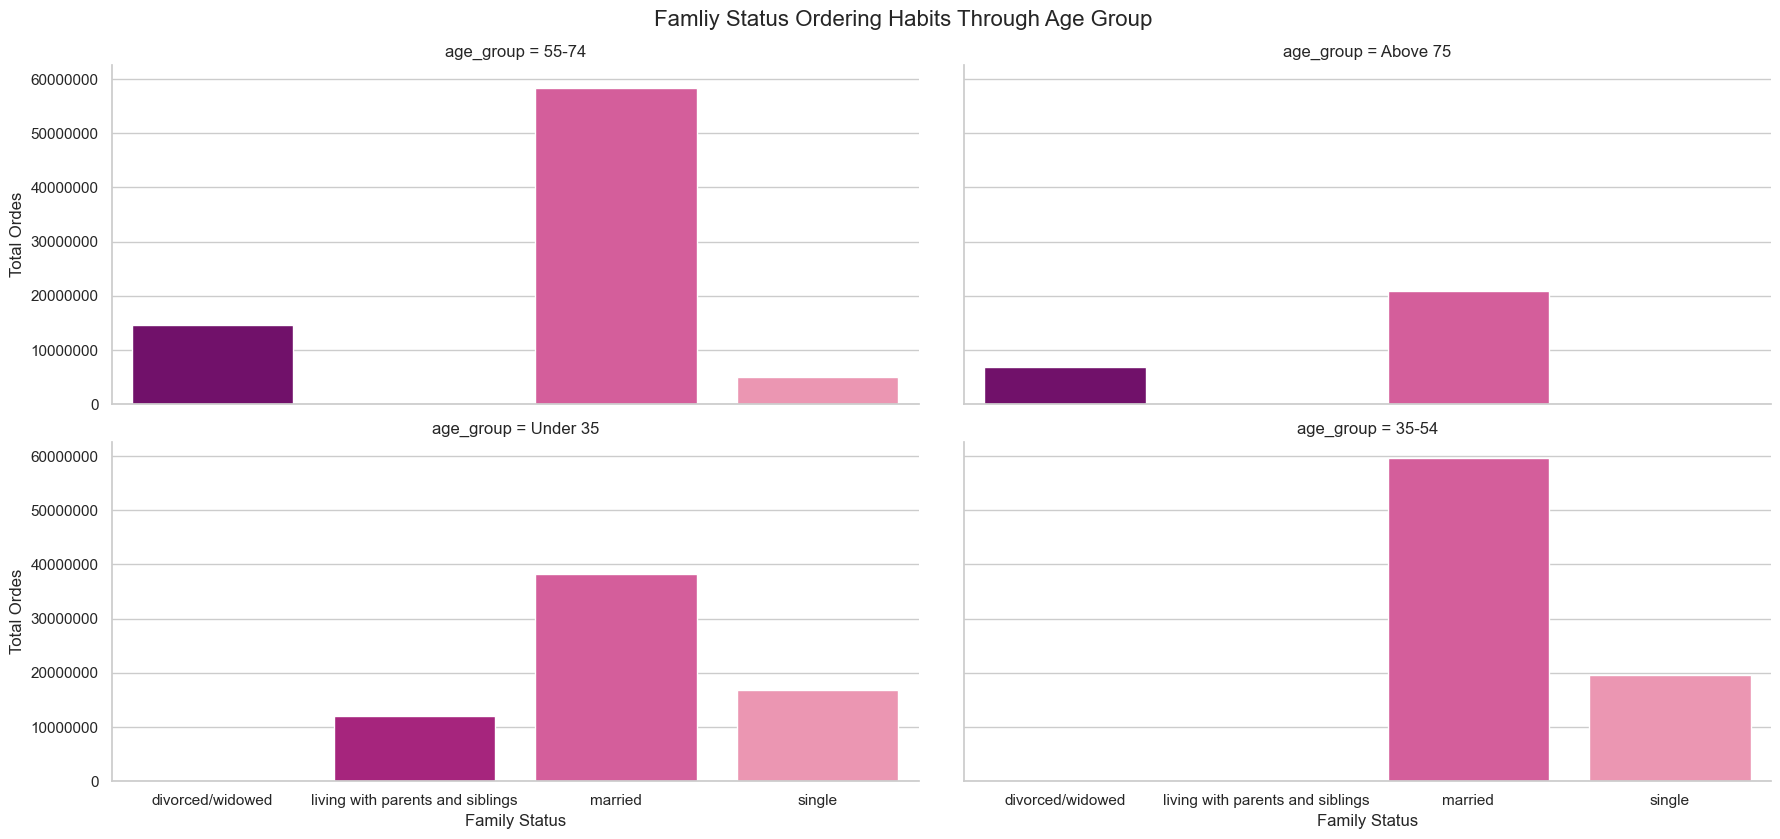

In [66]:
fam_age = final_all.groupby(['fam_status','age_group'])['prices'].agg('sum').reset_index()
g = sns.catplot(x='fam_status',
           y='prices',
           data=fam_age,
           kind='bar',
           col='age_group',
           col_wrap=2)
g.fig.set_size_inches(18,8)
g.set_axis_labels('Family Status','Total Ordes')
plt.ticklabel_format(axis='y',style='plain')
g.fig.suptitle('Famliy Status Ordering Habits Through Age Group',y=1.03,fontsize=16)
plt.show()


First of all, married status acrossed all age group and brought lot orders to us. In every single aga group, the married status all obtained the top 1 postion through the orders.

Living with family only showed in under 35 age group which means young people and with some orders but not too many, perhaps we have chance to increase the total sales through this group.

Divorced status are those people whose age above 55, and have more orders than the living with parents status group.

There is no single status in age above 75 group, but in the other three age groups. Their total orders only behind married status group which obtained the second position.

Lastly, married status in age 55-74 and 35-54 are our biggest orders groups.

#### Age group Across Income

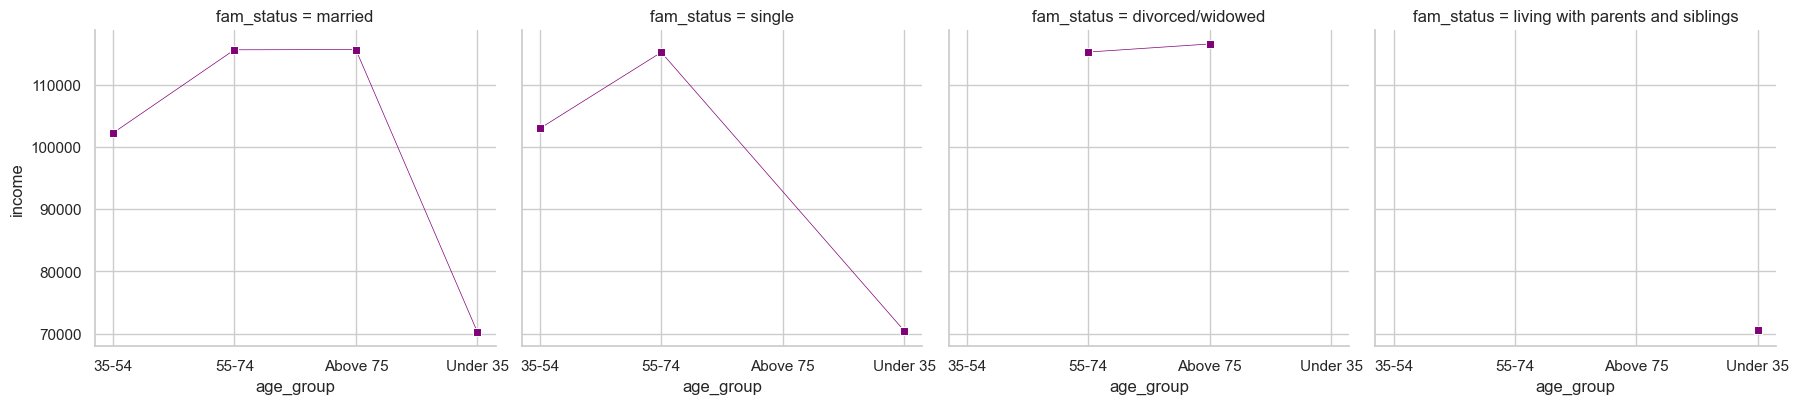

In [67]:
g = sns.relplot(x='age_group',
           y='income',
           data=final_all.groupby(['age_group','fam_status'])['income'].agg(np.mean).reset_index(),
           kind='line',
           marker='s',
           linewidth=0.5,
           col='fam_status')
g.fig.set_size_inches(18,4)
plt.show()

#### Age Group Order Status in Top 2 Department: Produce & Dairy Eggs

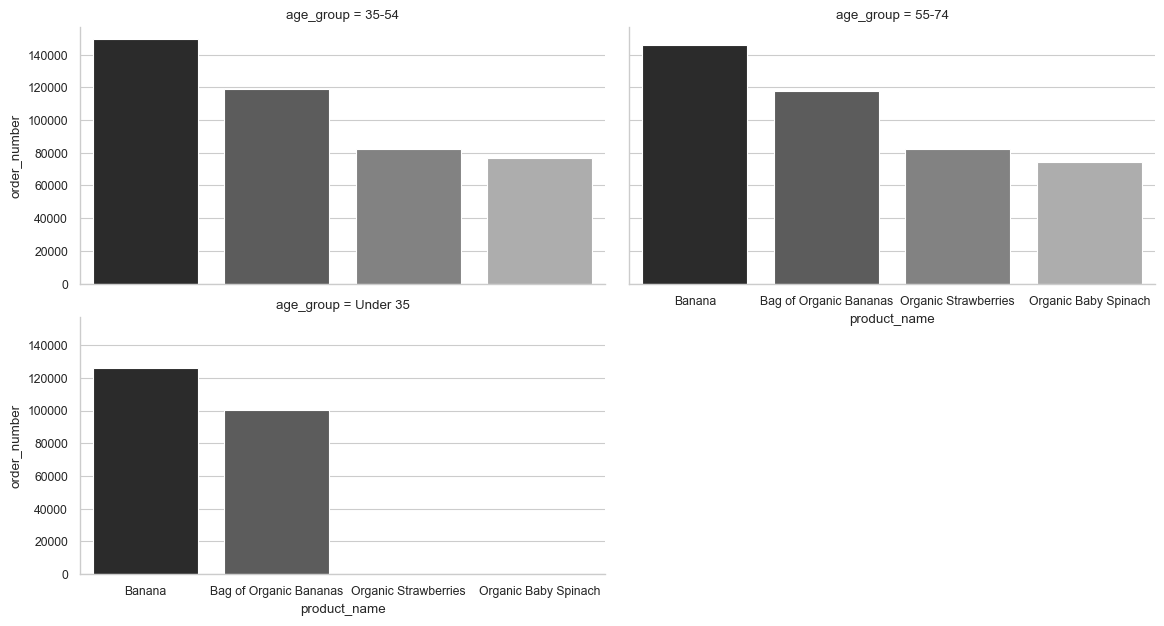

In [115]:
age_produce = final_all[final_all['department']=='produce'].groupby(['age_group','product_name'])['order_number'].agg('count').reset_index().sort_values(by='order_number',ascending=False)[:10]
sns.set_context('paper')
g = sns.catplot(x='product_name',
           y='order_number',
           data=age_produce,
           kind='bar',
           col='age_group',col_wrap=2)
g.fig.set_size_inches(12,6)
plt.show()

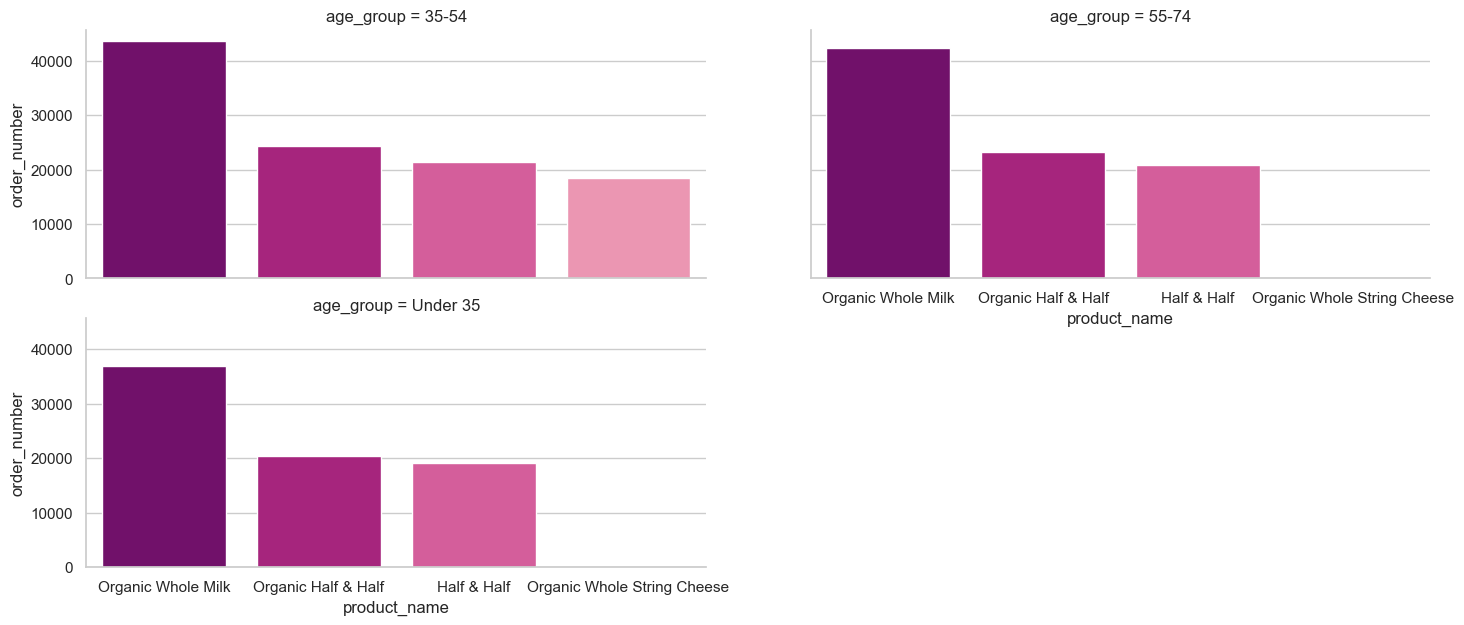

In [69]:
age_dairy_egg = final_all[final_all['department']=='dairy eggs'].groupby(['age_group','product_name'])['order_number'].agg('count').reset_index().sort_values(by='order_number',ascending=False)[:10]
g = sns.catplot(x='product_name',
           y='order_number',
           data=age_dairy_egg,
           kind='bar',
           col='age_group',col_wrap=2)
g.fig.set_size_inches(16,6)
plt.show()

### Date Joined Analysis: 

In [103]:
# import datetime to convert the date type from object to real date time format:
import datetime

In [71]:
# Convert to datetime:
final_all['date_joined'] = pd.to_datetime(final_all['date_joined'],format='%m/%d/%Y')

In [72]:
# Deversing year column:
final_all['year_joined'] = final_all['date_joined'].dt.year

In [73]:
# Deversing month column:
final_all['joined_month'] = final_all['date_joined'].dt.month

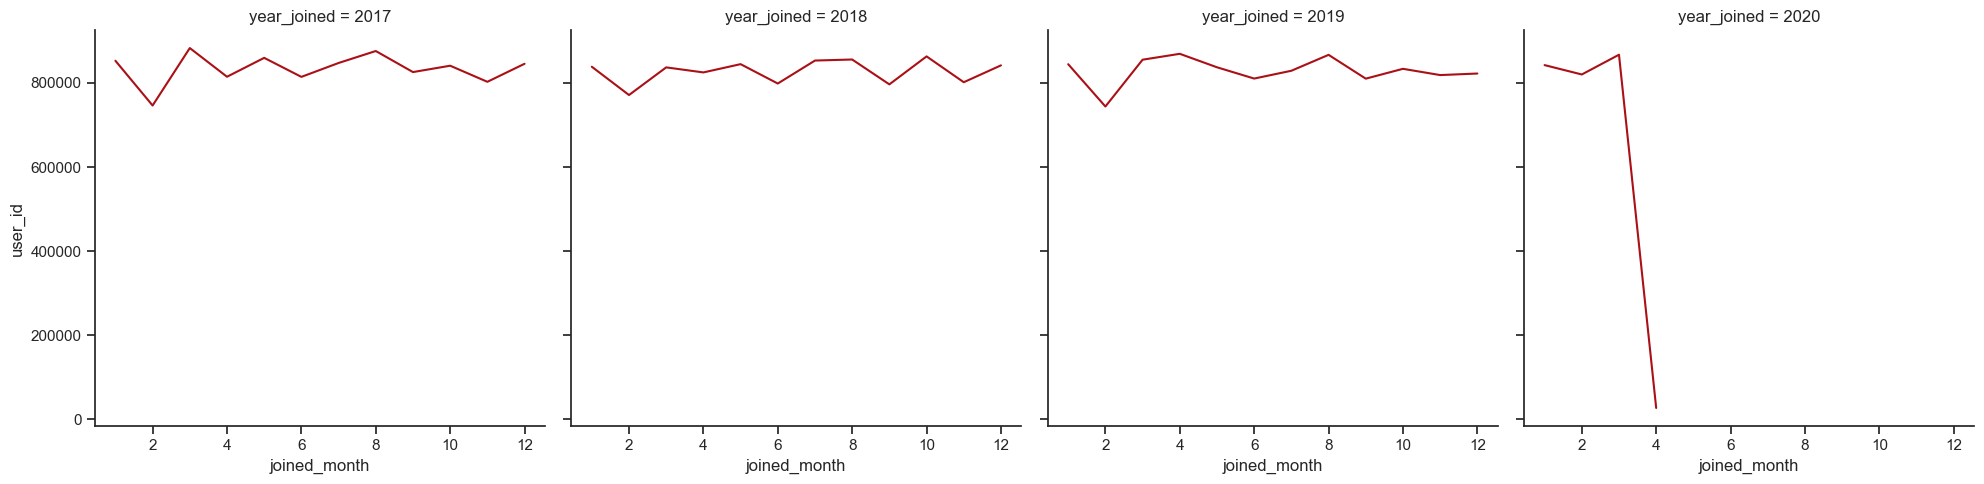

In [92]:
sns.set_palette('Reds_r')
sns.set_style('ticks')
g = sns.relplot(x='joined_month',
           y='user_id',
           data=final_all.groupby(['year_joined','joined_month'])['user_id'].agg('count').reset_index(),
           kind='line',
           col='year_joined')
plt.show()

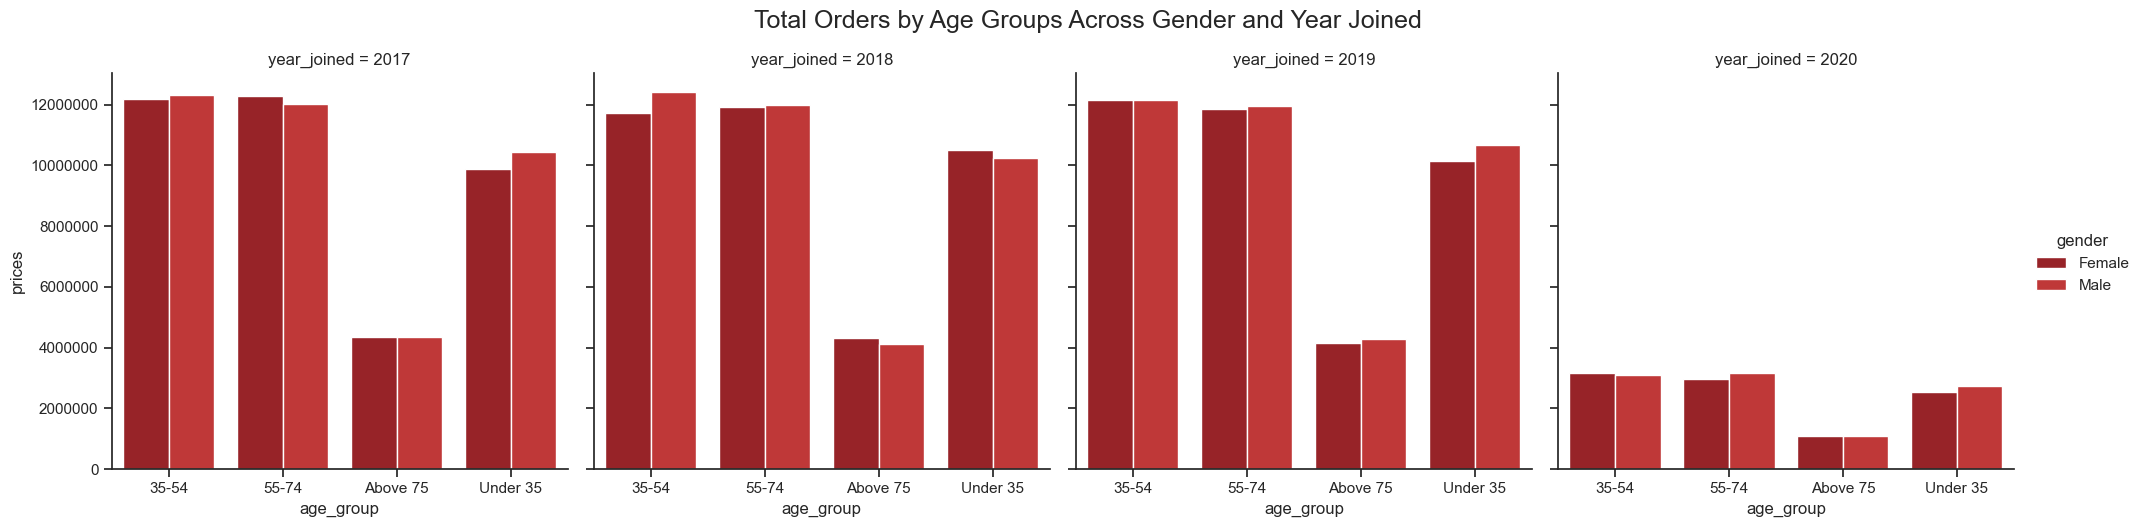

In [102]:
g = sns.catplot(x='age_group',
           y='prices',
           data=final_all.groupby(['year_joined','gender','age_group'])['prices'].agg('sum').reset_index(),
           kind='bar',
           col='year_joined',
           hue='gender')
plt.ticklabel_format(axis='y',style='plain')
g.fig.suptitle('Total Orders by Age Groups Across Gender and Year Joined',y=1.05,fontsize=18)
plt.show()